In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# not loading every file as it takes a lot of time as the files are very huge just loading first file 
df1=pd.read_csv('C:/Users/shrey/Downloads/Netflix Price/combined_data_1.txt',header=None, names=['Cust_Id', 'Rating'], usecols=[0,1])
#df2=pd.read_csv('C:/Users/shrey/Downloads/Netflix Price/combined_data_2.txt',header=None, names=['Cust_Id', 'Rating','Date'], usecols=[0,1,2])
#df3=pd.read_csv('C:/Users/shrey/Downloads/Netflix Price/combined_data_3.txt',header=None, names=['Cust_Id', 'Rating','Date'], usecols=[0,1,2])
#df4=pd.read_csv('C:/Users/shrey/Downloads/Netflix Price/combined_data_4.txt',header=None, names=['Cust_Id', 'Rating','Date'], usecols=[0,1,2])
# not appending as just have one file but can append all files into one dataframe
df = df1
#df = df1.append(df2)
#df = df.append(df3)
#df = df.append(df4)

In [3]:
#just looking at the data
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
#to know no of rows & columns
df.shape

(24058263, 2)

In [5]:
#to know datatypes
df.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:
#Basics statistics
df.describe()['Rating']

count    2.405376e+07
mean     3.599634e+00
std      1.086118e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [7]:
#Finding null values
df.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [8]:
#to find count of ratings based on no of users(group by ratings and getting the count)
stars=df.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [9]:
#to find no of movies in our dataset(using null as some of the rows has movie_id and rest of columnns are empty)
movie_count = df.isnull().sum()[1]
movie_count

4499

In [10]:
#get customer count (nunique returns no of unique values but the problem here is movie_id is also present in the cust_id)
cust_count=df['Cust_Id'].nunique()
cust_count

475257

In [11]:
# to get just customer count (cust_count along with movie_id subtracting from movie_count)
cust_count = cust_count - movie_count
cust_count

470758

In [12]:
# get rating count given by users
rating_count = df['Cust_Id'].count() - movie_count
rating_count

24053764

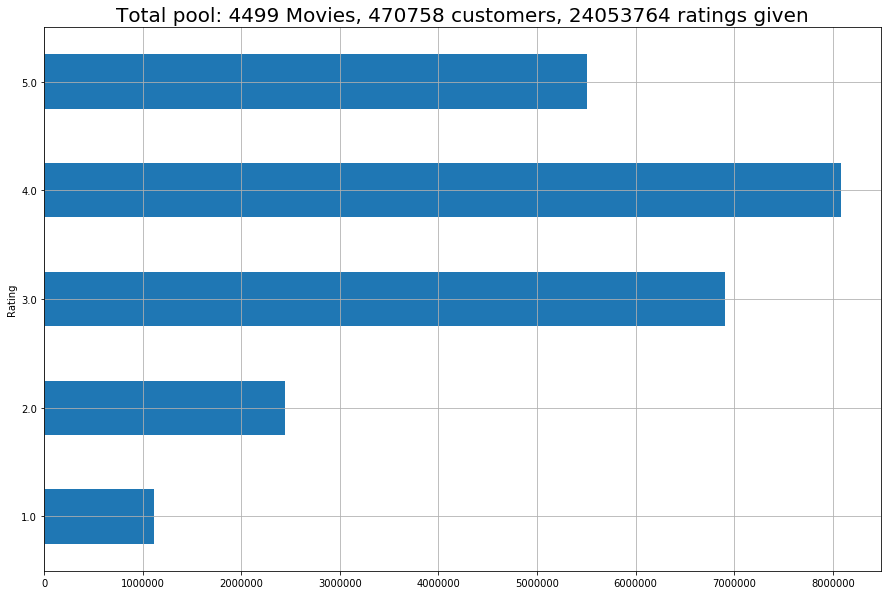

In [13]:
#bar chart to display information such as count of movies, customers and ratings given
chart = stars.plot(kind = 'barh', legend =False, figsize = (15,10))
# used f function can used .format too
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [14]:
#adding another column that has movie id
#need to find nan values in ratings column
dfnan=pd.DataFrame(pd.isnull(df.Rating))
dfnan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [15]:
dfnan=dfnan[dfnan['Rating']==True]
dfnan.shape

(4499, 1)

In [16]:
dfnan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [17]:
#reset basically adds index as a new column 
dfnan=dfnan.reset_index()
dfnan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [18]:
#create numpy array that will have 1 as movie_id from index 0 to 547, 2 as movie_id from index 548 to 693, 3 as movie_id from index 694 to 2706 and so on
movie_np = []
#initialise movie_id=1 and then it gets incremented after every for-loop
movie_id = 1
#zip working
x=zip(dfnan['index'][1:],dfnan['index'][:-1])
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [19]:
#zip will help to convert dataframe into tuple so that i,j(iterators) can go inside tuple 
#basically i is index position 1 and j is index position second last 
for i,j in zip(dfnan['index'][1:],dfnan['index'][:-1]):
#full will fill values from index 1 to i-j-1 index position by movie_ids(1 below represents index value for each iteration)
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

In [20]:
# Account for last record and corresponding length
# accessing movie id 4999 
last_record = np.full((1,len(df) - dfnan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)
print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [21]:
# remove those Movie ID rows(using ratings because rating will have nan values where just movie_id is present)
df = df[pd.notnull(df['Rating'])]

In [22]:
#adding new column movie_id & converting into integer type
df['Movie_Id'] = movie_np.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
##adding new column cust_id & converting into integer type
df['Cust_Id'] = df['Cust_Id'].astype(int)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [24]:
#Remove movie with too less reviews (they are relatively not popular)
#Remove customer who give too less reviews (they are relatively less active)
f = ['count','mean']
# for Movies(group by movies and give aggregate count for ratings)
df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
6,1019,3.084396
7,93,2.129032
8,14910,3.189805
9,95,2.621053


In [25]:
# store movie_id indexes in a var and convert them into integer
df_movie_summary.index = df_movie_summary.index.map(int)

In [26]:
# creating a benchmark for extracting (quantile divides dataset into ratio)
movie_benchmark = round(df_movie_summary['count'].quantile(0.75),0)
movie_benchmark

2538.0

In [27]:
# storing movie_id indexes where the count is less than benchmark 
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3374)

In [28]:
# Same thing for Users as done before for movies
df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.8),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649378, 2649379, 2649384, 2649388, 2649401, 2649404, 2649409,
            2649421, 2649426, 2649429],
           dtype='int64', name='Cust_Id', length=375433)

In [29]:
print('Original Shape: {}'.format(df.shape))
# exclude movie_id or cust_id if is present in the droptables(isin checks if present or not & ~:excludes rows)
df = df[~df['Movie_Id'].isin(drop_movie_list)]
# samething as for users done before for movies
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))

Original Shape: (24053764, 3)
After Trim Shape: (14058651, 3)


In [30]:
#Prepare dataset for SVD and it takes matrix as input (user-item interaction matrix) 
#Let's pivot the data set and put it into a sparse matrix(lots of empty cells) - we need it for our recommendation system:
#4999 movies
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')
print(df_p.shape)

(95325, 1125)


In [31]:
df_p.head()

Movie_Id,8,16,17,18,26,28,30,33,44,45,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# used encoding because there are special characters text in csv file & don't use first row as header & names as columns names 
movies=pd.read_csv('C:/Users/shrey/Downloads/Netflix Price/movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
#inplace because store it into original dataframe(movies)
movies.set_index('Movie_Id', inplace = True)
print(movies.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [33]:
#importing libraries for recommendation system
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate

In [34]:
#creating object so that we don't need to use it write it again
reader=Reader()
# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)
svd = SVD()
#used verbose because we want to display values into output 
#While working for fold 1 it will considered as test data and rest as train data and so on for other folds
cross_validate(svd, data, measures=['RMSE', 'MAE'],cv=3, verbose=True)
#data.split(n_folds=3)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9846  0.9852  0.9851  0.9850  0.0003  
MAE (testset)     0.7901  0.7933  0.7923  0.7919  0.0013  
Fit time          4.11    4.13    4.15    4.13    0.02    
Test time         0.26    0.20    0.25    0.23    0.03    


{'test_rmse': array([0.98460741, 0.98518841, 0.98506897]),
 'test_mae': array([0.79008771, 0.79327125, 0.79234411]),
 'fit_time': (4.105011224746704, 4.128984451293945, 4.150898694992065),
 'test_time': (0.25731396675109863, 0.1974332332611084, 0.24933171272277832)}

In [35]:
df.head()

,Cust_Id,Rating,Movie_Id
5109,785314,1.0,8
5110,243963,3.0,8
5112,1447783,4.0,8
5116,1912665,1.0,8
5119,1744889,1.0,8


In [36]:
# we takeuser 243963 and try to recommend movies based on pastdata(considers all movies which are rated as 5 by user 243963)
df_243963 = df[(df['Cust_Id'] == 243963) & (df['Rating'] == 5)]
df_243963

,Cust_Id,Rating,Movie_Id
577924,243963,5.0,175
898615,243963,5.0,199
951826,243963,5.0,215
967689,243963,5.0,223
1377562,243963,5.0,299
1563595,243963,5.0,313
1671039,243963,5.0,329
1764158,243963,5.0,331
2230243,243963,5.0,422
2289753,243963,5.0,442


In [37]:
# set movie_id column as index position
df_243963 = df_243963.set_index('Movie_Id')
df_243963

,Cust_Id,Rating
Movie_Id,,
175,243963,5.0
199,243963,5.0
215,243963,5.0
223,243963,5.0
299,243963,5.0
313,243963,5.0
329,243963,5.0
331,243963,5.0
422,243963,5.0


In [38]:
#join with movies table to see movie's name
df_243963 = df_243963.join(movies)['Name']
print(df_243963)

Movie_Id
175                             Reservoir Dogs
199                            The Deer Hunter
215                   That '70s Show: Season 1
223                 Chappelle's Show: Season 1
299                      Bridget Jones's Diary
313                             Pay It Forward
329                                      Dogma
331                                Chasing Amy
422                 The Unsinkable Molly Brown
442                        Mississippi Burning
457                          Kill Bill: Vol. 2
483                                Rush Hour 2
652                              Marvin's Room
788                                     Clerks
789                            Boyz N the Hood
886                                        Ray
963                   A Streetcar Named Desire
1020                    The Simpsons: Season 1
1073                              Coach Carter
1102                              Training Day
1110                          Secondhand Lions
1144

In [39]:
#now we will build recommendation algorithm
#firt create a copy of the movies list which can be used later on
user_243963=movies.copy()

In [40]:
#use reset_index in order to have movie_id as column and not index
user_243963=user_243963.reset_index()
user_243963

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
6,7,1992.0,8 Man
7,8,2004.0,What the #$*! Do We Know!?
8,9,1991.0,Class of Nuke 'Em High 2
9,10,2001.0,Fighter


In [42]:
#check movie_id which are present in the dropframe and exclude movies which we have already dropped
user_243963=user_243963[~user_243963['Movie_Id'].isin(drop_movie_list)]
user_243963

,Movie_Id,Year,Name
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
25,26,2004.0,Never Die Alone
27,28,2002.0,Lilo and Stitch
29,30,2003.0,Something's Gotta Give
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1
43,44,1996.0,Spitfire Grill
44,45,1999.0,The Love Letter


In [43]:
#now we will train algorithm with whole dataset
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

In [44]:
#building trainset using suprise package
trainset=data.build_full_trainset()
svd.fit(trainset)

In [45]:
# predict svd using lamda function(.est gives estimate score)
user_243963['Est_score']=user_243963['Movie_Id'].apply(lambda x:svd.predict(243963,x).est)
# drop movie_id column from dataset
user_243963=user_243963.drop('Movie_Id',axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
#Following movies are recommended to user_243963 
user_243963=user_243963.sort_values('Est_score', ascending=False)
print(user_243963.head(10))

        Year                                        Name  Est_score
824   1983.0                         Bill Cosby: Himself        5.0
1475  2004.0                    Six Feet Under: Season 4        5.0
3522  1992.0    Star Trek: The Next Generation: Season 6        5.0
2547  2000.0                     Gilmore Girls: Season 1        5.0
751   1993.0    Star Trek: The Next Generation: Season 7        5.0
3768  2004.0            Wonderfalls: The Complete Series        5.0
2194  2004.0  The Looney Tunes Golden Collection: Vol. 2        5.0
1551  1983.0                                 Black Adder        5.0
4495  1993.0                       Farewell My Concubine        5.0
3998  2001.0                     Queer as Folk: Season 1        5.0
